In [1392]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_blobs

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from astroquery.simbad import Simbad
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [1393]:
## First I want to read in all the data 

data = pd.read_csv('/Users/loggy/Desktop/Astr519_Homework/ASTR519Project/MWSC Catalogue - Sheet1.csv')

lii = data['lii']
bii = data['bii']
ra = data['ra']
dec = data['dec']
core_radius = data['core_radius']
num_core_stars = data['num_core_stars']
distance = data['distance']
reddening = data['e_bv']
log_age = data['log_age']
metallicity = data['metallicity']
classification = data['class']

cluster_data_matrix = []
cluster_age_matrix = []
## Populate the data matrix 

sourceLength = len(metallicity)

for i in range(sourceLength):
    if np.isnan(metallicity[i] or lii[i] or bii[i] or ra[i] or dec[i] or core_radius[i] or num_core_stars[i] or distance[i] or reddening[i] or log_age[i]) == False:
        if classification[i] == 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC':
            tempList = [lii[i], bii[i], ra[i], dec[i], core_radius[i], num_core_stars[i], distance[i], reddening[i], metallicity[i]]
            cluster_data_matrix.append(tempList)
            cluster_age_matrix.append(log_age[i])




In [1394]:
## Now that we have our data cluster matrix we can do stuff with it!! 

## First we will start with training stuff

cluster_train, cluster_test, age_train, age_test = train_test_split(cluster_data_matrix, cluster_age_matrix, test_size=0.5)

# Create a decision tree regressor
model = DecisionTreeRegressor(max_depth=5)

# Train the model
model.fit(cluster_train, age_train)

# Make predictions on the test set
predictions = model.predict(cluster_test)

mse = mean_squared_error(age_test, predictions)
# print(age_test)
# print(predictions)

print(f'Mean Squared Error: {mse}')
# Number of folds for cross-validation
k_folds = 5
model = RandomForestRegressor(n_estimators=100)
kf = KFold(n_splits=k_folds, shuffle=True)

train_mse_list = []
val_mse_list = []
cluster_data_matrix_supreme = np.array(cluster_data_matrix)
cluster_age_matrix_supreme = np.array(cluster_age_matrix)
# Perform k-fold cross-validation
for train_index, test_index in kf.split(cluster_age_matrix_supreme):
    X_train, X_val = cluster_data_matrix_supreme[train_index], cluster_data_matrix_supreme[test_index]
    y_train, y_val = cluster_age_matrix_supreme[train_index], cluster_age_matrix_supreme[test_index]

    # Fit the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on the training set
    train_predictions = model.predict(X_train)

    # Make predictions on the validation set
    val_predictions = model.predict(X_val)

    # Calculate MSE for training and validation sets
    train_mse = mean_squared_error(y_train, train_predictions)
    val_mse = mean_squared_error(y_val, val_predictions)

    # Store MSE for each fold
    train_mse_list.append(train_mse)
    val_mse_list.append(val_mse)

# Calculate and print the average MSE across all folds
average_train_mse = np.mean(train_mse_list)
average_val_mse = np.mean(val_mse_list)

print(f'Average Training MSE: {average_train_mse}')
print(f'Average Validation MSE: {average_val_mse}')

Mean Squared Error: 0.0038430930930930993
Average Training MSE: 0.0003376180573663069
Average Validation MSE: 0.0023997369540229253


In [1395]:
## that was neat and also the error was not too bad i think (might have to check if we have to change it from log or not but I believe not)

## Now we can test removing variables

# what if we removed ra, dec, distance, lii, bii, and reddening

cluster_data_matrix_supreme = []
cluster_age_matrix_supreme = []

for i in range(sourceLength):
    if np.isnan(metallicity[i] or lii[i] or bii[i] or ra[i] or dec[i] or core_radius[i] or num_core_stars[i] or distance[i] or reddening[i] or log_age[i]) == False:
        if classification[i] == 'OPEN STAR CLUSTER':
            tempList = [core_radius[i], num_core_stars[i], metallicity[i]]
            cluster_data_matrix_supreme.append(tempList)
            cluster_age_matrix_supreme.append(log_age[i])

cluster_train, cluster_test, age_train, age_test = train_test_split(cluster_data_matrix_supreme, cluster_age_matrix_supreme, test_size=0.5)

# Create a decision tree regressor
model = DecisionTreeRegressor(max_depth=5)

# Train the model
model.fit(cluster_train, age_train)

# Make predictions on the test set
predictions = model.predict(cluster_test)

mse = mean_squared_error(age_test, predictions)
# print(age_test)
# print(predictions)
print(f'Mean Squared Error: {mse}')

# why is it sorta worse, maybe galactic coordinates are at play here due to a trend stemming from virialization, lets try this again
# Number of folds for cross-validation
k_folds = 5
model = RandomForestRegressor(n_estimators=100)
kf = KFold(n_splits=k_folds, shuffle=True)

train_mse_list = []
val_mse_list = []
cluster_data_matrix_supreme = np.array(cluster_data_matrix_supreme)
cluster_age_matrix_supreme = np.array(cluster_age_matrix_supreme)
# Perform k-fold cross-validation
for train_index, test_index in kf.split(cluster_age_matrix_supreme):
    X_train, X_val = cluster_data_matrix_supreme[train_index], cluster_data_matrix_supreme[test_index]
    y_train, y_val = cluster_age_matrix_supreme[train_index], cluster_age_matrix_supreme[test_index]

    # Fit the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on the training set
    train_predictions = model.predict(X_train)

    # Make predictions on the validation set
    val_predictions = model.predict(X_val)

    # Calculate MSE for training and validation sets
    train_mse = mean_squared_error(y_train, train_predictions)
    val_mse = mean_squared_error(y_val, val_predictions)

    # Store MSE for each fold
    train_mse_list.append(train_mse)
    val_mse_list.append(val_mse)

# Calculate and print the average MSE across all folds
average_train_mse = np.mean(train_mse_list)
average_val_mse = np.mean(val_mse_list)

print(f'Average Training MSE: {average_train_mse}')
print(f'Average Validation MSE: {average_val_mse}')

Mean Squared Error: 0.4686322531685909
Average Training MSE: 0.0675690657317187
Average Validation MSE: 0.4703310584326381


In [1396]:
cluster_data_matrix_supreme = []
cluster_age_matrix_supreme = []

 ## Maybe latitude helped a bit

for i in range(sourceLength):
    if np.isnan(metallicity[i] or lii[i] or bii[i] or ra[i] or dec[i] or core_radius[i] or num_core_stars[i] or distance[i] or reddening[i] or log_age[i]) == False:
        if classification[i] == 'OPEN STAR CLUSTER':
            tempList = [bii[i], core_radius[i], num_core_stars[i], metallicity[i]]
            cluster_data_matrix_supreme.append(tempList)
            cluster_age_matrix_supreme.append(log_age[i])

cluster_train, cluster_test, age_train, age_test = train_test_split(cluster_data_matrix_supreme, cluster_age_matrix_supreme, test_size=0.5)

# Create a decision tree regressor
model = DecisionTreeRegressor(max_depth=5)

# Train the model
model.fit(cluster_train, age_train)

# Make predictions on the test set
predictions = model.predict(cluster_test)

mse = mean_squared_error(age_test, predictions)
# print(age_test)
# print(predictions)
print(f'Mean Squared Error: {mse}')

## definitley better than before but not as good as we want
# Number of folds for cross-validation
k_folds = 5
model = RandomForestRegressor(n_estimators=100)
kf = KFold(n_splits=k_folds, shuffle=True)

train_mse_list = []
val_mse_list = []
cluster_data_matrix_supreme = np.array(cluster_data_matrix_supreme)
cluster_age_matrix_supreme = np.array(cluster_age_matrix_supreme)
# Perform k-fold cross-validation
for train_index, test_index in kf.split(cluster_age_matrix_supreme):
    X_train, X_val = cluster_data_matrix_supreme[train_index], cluster_data_matrix_supreme[test_index]
    y_train, y_val = cluster_age_matrix_supreme[train_index], cluster_age_matrix_supreme[test_index]

    # Fit the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on the training set
    train_predictions = model.predict(X_train)

    # Make predictions on the validation set
    val_predictions = model.predict(X_val)

    # Calculate MSE for training and validation sets
    train_mse = mean_squared_error(y_train, train_predictions)
    val_mse = mean_squared_error(y_val, val_predictions)

    # Store MSE for each fold
    train_mse_list.append(train_mse)
    val_mse_list.append(val_mse)

# Calculate and print the average MSE across all folds
average_train_mse = np.mean(train_mse_list)
average_val_mse = np.mean(val_mse_list)

print(f'Average Training MSE: {average_train_mse}')
print(f'Average Validation MSE: {average_val_mse}')

Mean Squared Error: 0.5097775607244331
Average Training MSE: 0.05100169734866676
Average Validation MSE: 0.36575083695866695


In [1397]:
cluster_data_matrix_supreme = []
cluster_age_matrix_supreme = []

for i in range(sourceLength):
    if np.isnan(metallicity[i] or lii[i] or bii[i] or ra[i] or dec[i] or core_radius[i] or num_core_stars[i] or distance[i] or reddening[i] or log_age[i]) == False:
        if classification[i] == 'OPEN STAR CLUSTER':
            tempList = [bii[i], core_radius[i], num_core_stars[i], metallicity[i], distance[i]]
            cluster_data_matrix_supreme.append(tempList)
            cluster_age_matrix_supreme.append(log_age[i])

cluster_train, cluster_test, age_train, age_test = train_test_split(cluster_data_matrix_supreme, cluster_age_matrix_supreme, test_size=0.5)

# Create a decision tree regressor
model = DecisionTreeRegressor(max_depth=5)

# Train the model
model.fit(cluster_train, age_train)

# Make predictions on the test set
predictions = model.predict(cluster_test)

mse = mean_squared_error(age_test, predictions)
# print(age_test)
# print(predictions)
print(f'Mean Squared Error: {mse}')

# adding distance in made that way better wtf
# Number of folds for cross-validation
k_folds = 5
model = RandomForestRegressor(n_estimators=100)
kf = KFold(n_splits=k_folds, shuffle=True)

train_mse_list = []
val_mse_list = []
cluster_data_matrix_supreme = np.array(cluster_data_matrix_supreme)
cluster_age_matrix_supreme = np.array(cluster_age_matrix_supreme)
# Perform k-fold cross-validation
for train_index, test_index in kf.split(cluster_age_matrix_supreme):
    X_train, X_val = cluster_data_matrix_supreme[train_index], cluster_data_matrix_supreme[test_index]
    y_train, y_val = cluster_age_matrix_supreme[train_index], cluster_age_matrix_supreme[test_index]

    # Fit the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on the training set
    train_predictions = model.predict(X_train)

    # Make predictions on the validation set
    val_predictions = model.predict(X_val)

    # Calculate MSE for training and validation sets
    train_mse = mean_squared_error(y_train, train_predictions)
    val_mse = mean_squared_error(y_val, val_predictions)

    # Store MSE for each fold
    train_mse_list.append(train_mse)
    val_mse_list.append(val_mse)

# Calculate and print the average MSE across all folds
average_train_mse = np.mean(train_mse_list)
average_val_mse = np.mean(val_mse_list)

print(f'Average Training MSE: {average_train_mse}')
print(f'Average Validation MSE: {average_val_mse}')

Mean Squared Error: 0.422869649559343
Average Training MSE: 0.04076805195933318
Average Validation MSE: 0.32807314746488925


In [1398]:
cluster_data_matrix_supreme = []
cluster_age_matrix_supreme = []

for i in range(sourceLength):
    if np.isnan(metallicity[i] or lii[i] or bii[i] or ra[i] or dec[i] or core_radius[i] or num_core_stars[i] or distance[i] or reddening[i] or log_age[i]) == False:
        if classification[i] == 'OPEN STAR CLUSTER':
            tempList = [metallicity[i]]
            cluster_data_matrix_supreme.append(tempList)
            cluster_age_matrix_supreme.append(log_age[i])

cluster_train, cluster_test, age_train, age_test = train_test_split(cluster_data_matrix_supreme, cluster_age_matrix_supreme, test_size=0.5)

# Create a decision tree regressor
model = DecisionTreeRegressor(max_depth=5)

# Train the model
model.fit(cluster_train, age_train)

# Make predictions on the test set
predictions = model.predict(cluster_test)

mse = mean_squared_error(age_test, predictions)
# print(age_test)
# print(predictions)
print(f'Mean Squared Error: {mse}')

# metallicity does ok on its own 

Mean Squared Error: 0.5596968400638452


In [1399]:
cluster_data_matrix_supreme = []
cluster_age_matrix_supreme = []

for i in range(sourceLength):
    if np.isnan(metallicity[i] or lii[i] or bii[i] or ra[i] or dec[i] or core_radius[i] or num_core_stars[i] or distance[i] or reddening[i] or log_age[i]) == False:
        if classification[i] == 'OPEN STAR CLUSTER':
            tempList = [distance[i]]
            cluster_data_matrix_supreme.append(tempList)
            cluster_age_matrix_supreme.append(log_age[i])

cluster_train, cluster_test, age_train, age_test = train_test_split(cluster_data_matrix_supreme, cluster_age_matrix_supreme, test_size=0.5)

# Create a decision tree regressor
model = DecisionTreeRegressor(max_depth=5)

# Train the model
model.fit(cluster_train, age_train)

# Make predictions on the test set
predictions = model.predict(cluster_test)

mse = mean_squared_error(age_test, predictions)
# print(age_test)
# print(predictions)
print(f'Mean Squared Error: {mse}')

##oddly enough there seems to be some strong coorellation between age ans distance???????

Mean Squared Error: 0.5629436618779619


In [1400]:
## Now, not too many of these stars had metallicity values, so lets try to expand our set

cluster_data_matrix_supreme = []
cluster_age_matrix_supreme = []


for i in range(sourceLength):
    if np.isnan(lii[i] or bii[i] or ra[i] or dec[i] or core_radius[i] or num_core_stars[i] or distance[i] or reddening[i] or log_age[i]) == False:
        if classification[i] == 'OPEN STAR CLUSTER':
            tempList = [lii[i], bii[i], ra[i], dec[i], core_radius[i], num_core_stars[i], distance[i], reddening[i]]
            cluster_data_matrix_supreme.append(tempList)
            cluster_age_matrix_supreme.append(log_age[i])

cluster_train, cluster_test, age_train, age_test = train_test_split(cluster_data_matrix_supreme, cluster_age_matrix_supreme, test_size=0.5)

# Create a decision tree regressor
model = DecisionTreeRegressor(max_depth=5)

# Train the model
model.fit(cluster_train, age_train)

# Make predictions on the test set
predictions = model.predict(cluster_test)

mse = mean_squared_error(age_test, predictions)
# print(age_test)
# print(predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.5301184510876004


In [1401]:
## Now, not too many of these stars had metallicity values, so lets try to expand our set by removing metallicity as a parameter

cluster_data_matrix_supreme = []
cluster_age_matrix_supreme = []


for i in range(sourceLength):
    if np.isnan(lii[i] or bii[i] or ra[i] or dec[i] or core_radius[i] or num_core_stars[i] or distance[i] or reddening[i] or log_age[i]) == False:
        if classification[i] == 'OPEN STAR CLUSTER':
            tempList = [lii[i], bii[i], core_radius[i], num_core_stars[i], reddening[i]]
            cluster_data_matrix_supreme.append(tempList)
            cluster_age_matrix_supreme.append(log_age[i])

cluster_train, cluster_test, age_train, age_test = train_test_split(cluster_data_matrix_supreme, cluster_age_matrix_supreme, test_size=0.5)
# Create a decision tree regressor
model = DecisionTreeRegressor(max_depth=5)

# Train the model
model.fit(cluster_train, age_train)

# Make predictions on the test set
predictions = model.predict(cluster_test)

mse = mean_squared_error(age_test, predictions)
# print(age_test)
# print(predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.560583472740036


In [1402]:
## Now, not too many of these stars had metallicity values, so lets try to expand our set

cluster_data_matrix_supreme = []
cluster_age_matrix_supreme = []


for i in range(sourceLength):
    if np.isnan(lii[i] or bii[i] or ra[i] or dec[i] or core_radius[i] or num_core_stars[i] or distance[i] or reddening[i] or log_age[i]) == False:
        if classification[i] == 'OPEN STAR CLUSTER':
            tempList = [distance[i]]
            cluster_data_matrix_supreme.append(tempList)
            cluster_age_matrix_supreme.append(log_age[i])

cluster_train, cluster_test, age_train, age_test = train_test_split(cluster_data_matrix_supreme, cluster_age_matrix_supreme, test_size=0.5)

# Create a decision tree regressor
model = DecisionTreeRegressor(max_depth=5)

# Train the model
model.fit(cluster_train, age_train)

# Make predictions on the test set
predictions = model.predict(cluster_test)

mse = mean_squared_error(age_test, predictions)
# print(age_test)
# print(predictions)
print(f'Mean Squared Error: {mse}')

## Ok at least this is worse now

Mean Squared Error: 0.7750830283877197


In [1403]:
## Now lets try it with random forest

cluster_data_matrix_supreme = []
cluster_age_matrix_supreme = []

for i in range(sourceLength):
    if np.isnan(metallicity[i] or lii[i] or bii[i] or ra[i] or dec[i] or core_radius[i] or num_core_stars[i] or distance[i] or reddening[i] or log_age[i]) == False:
        if classification[i] == 'OPEN STAR CLUSTER':
            tempList = [lii[i], bii[i], ra[i], dec[i], core_radius[i], num_core_stars[i], distance[i], reddening[i], metallicity[i]]
            cluster_data_matrix_supreme.append(tempList)
            cluster_age_matrix_supreme.append(log_age[i])

cluster_train, cluster_test, age_train, age_test = train_test_split(cluster_data_matrix_supreme, cluster_age_matrix_supreme, test_size=0.5)

# Create a decision tree regressor
model = RandomForestRegressor(max_depth=10, n_estimators=100)

# Train the model
model.fit(cluster_train, age_train)

# Make predictions on the test set
predictions = model.predict(cluster_test)

mse = mean_squared_error(age_test, predictions)
# print(age_test)
# print(predictions)
print(f'Mean Squared Error: {mse}')

# Random forest seems to offer slightly better results
# Number of folds for cross-validation
k_folds = 5
model = RandomForestRegressor(n_estimators=100)
kf = KFold(n_splits=k_folds, shuffle=True)

train_mse_list = []
val_mse_list = []
cluster_data_matrix_supreme = np.array(cluster_data_matrix_supreme)
cluster_age_matrix_supreme = np.array(cluster_age_matrix_supreme)
# Perform k-fold cross-validation
for train_index, test_index in kf.split(cluster_age_matrix_supreme):
    X_train, X_val = cluster_data_matrix_supreme[train_index], cluster_data_matrix_supreme[test_index]
    y_train, y_val = cluster_age_matrix_supreme[train_index], cluster_age_matrix_supreme[test_index]

    # Fit the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on the training set
    train_predictions = model.predict(X_train)

    # Make predictions on the validation set
    val_predictions = model.predict(X_val)

    # Calculate MSE for training and validation sets
    train_mse = mean_squared_error(y_train, train_predictions)
    val_mse = mean_squared_error(y_val, val_predictions)

    # Store MSE for each fold
    train_mse_list.append(train_mse)
    val_mse_list.append(val_mse)

# Calculate and print the average MSE across all folds
average_train_mse = np.mean(train_mse_list)
average_val_mse = np.mean(val_mse_list)

print(f'Average Training MSE: {average_train_mse}')
print(f'Average Validation MSE: {average_val_mse}')

Mean Squared Error: 0.2628369115588097
Average Training MSE: 0.04196821936877768
Average Validation MSE: 0.3069689023924446


In [1404]:
## Lets try with globs now

cluster_data_matrix_supreme = []
cluster_age_matrix_supreme = []

for i in range(sourceLength):
    if np.isnan(metallicity[i] or lii[i] or bii[i] or ra[i] or dec[i] or core_radius[i] or num_core_stars[i] or distance[i] or reddening[i] or log_age[i]) == False:
        if classification[i] == 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC':
            tempList = [lii[i], bii[i], ra[i], dec[i], core_radius[i], num_core_stars[i], distance[i], reddening[i], metallicity[i]]
            cluster_data_matrix_supreme.append(tempList)
            cluster_age_matrix_supreme.append(log_age[i])
print(len(cluster_age_matrix_supreme))

cluster_train, cluster_test, age_train, age_test = train_test_split(cluster_data_matrix_supreme, cluster_age_matrix_supreme, test_size=0.5)

# Create a decision tree regressor
model = RandomForestRegressor(max_depth=10, n_estimators=100)

# Train the model
model.fit(cluster_train, age_train)

# Make predictions on the test set
predictions = model.predict(cluster_test)

mse = mean_squared_error(age_test, predictions)
# print(age_test)
# print(predictions)
print(f'Mean Squared Error: {mse}')

##sorta sucks since all of them are around the same age
# Number of folds for cross-validation
k_folds = 5
model = RandomForestRegressor(n_estimators=100)
kf = KFold(n_splits=k_folds, shuffle=True)

train_mse_list = []
val_mse_list = []
cluster_data_matrix_supreme = np.array(cluster_data_matrix_supreme)
cluster_age_matrix_supreme = np.array(cluster_age_matrix_supreme)
# Perform k-fold cross-validation
for train_index, test_index in kf.split(cluster_age_matrix_supreme):
    X_train, X_val = cluster_data_matrix_supreme[train_index], cluster_data_matrix_supreme[test_index]
    y_train, y_val = cluster_age_matrix_supreme[train_index], cluster_age_matrix_supreme[test_index]

    # Fit the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on the training set
    train_predictions = model.predict(X_train)

    # Make predictions on the validation set
    val_predictions = model.predict(X_val)

    # Calculate MSE for training and validation sets
    train_mse = mean_squared_error(y_train, train_predictions)
    val_mse = mean_squared_error(y_val, val_predictions)

    # Store MSE for each fold
    train_mse_list.append(train_mse)
    val_mse_list.append(val_mse)

# Calculate and print the average MSE across all folds
average_train_mse = np.mean(train_mse_list)
average_val_mse = np.mean(val_mse_list)

print(f'Average Training MSE: {average_train_mse}')
print(f'Average Validation MSE: {average_val_mse}')

147
Mean Squared Error: 0.0020383006756756025
Average Training MSE: 0.000331759130088311
Average Validation MSE: 0.002324360804597637


147
Mean Squared Error: 0.0043168400900900645


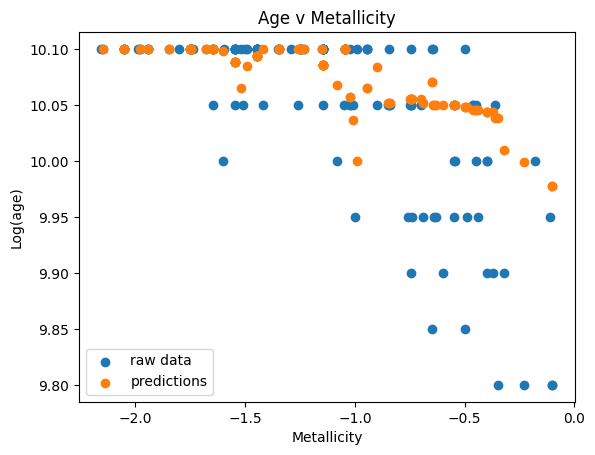

Average Training MSE: 0.00092401327745051
Average Validation MSE: 0.003585312849357093


In [1405]:
cluster_data_matrix_supreme = []
cluster_age_matrix_supreme = []
metallicityNumbers = []
for i in range(sourceLength):
    if np.isnan(metallicity[i] or lii[i] or bii[i] or ra[i] or dec[i] or core_radius[i] or num_core_stars[i] or distance[i] or reddening[i] or log_age[i]) == False:
        if classification[i] == 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC':
            cluster_data_matrix_supreme.append([metallicity[i]])
            metallicityNumbers.append(metallicity[i])
            cluster_age_matrix_supreme.append(log_age[i])
print(len(cluster_age_matrix_supreme))

cluster_train, cluster_test, age_train, age_test = train_test_split(cluster_data_matrix_supreme, cluster_age_matrix_supreme, test_size=0.75)

# Create a decision tree regressor
model = RandomForestRegressor(max_depth=10, n_estimators=100)

# Train the model
model.fit(cluster_train, age_train)

# Make predictions on the test set
predictions = model.predict(cluster_test)

mse = mean_squared_error(age_test, predictions)
# print(age_test)
# print(predictions)
print(f'Mean Squared Error: {mse}')
plt.title('Age v Metallicity')
plt.xlabel('Metallicity')
plt.ylabel('Log(age)')
plt.scatter(metallicityNumbers, cluster_age_matrix_supreme, label='raw data')
plt.scatter(cluster_test, predictions, label='predictions')
plt.legend()
plt.show()

##metallicity alone does provide the best fit so far, other useless parameters are tyipcally in the rmse range of 0.008 and metallicity consistenly gives around 0.002-3
# Number of folds for cross-validation
k_folds = 5
model = RandomForestRegressor(n_estimators=100)
kf = KFold(n_splits=k_folds, shuffle=True)

train_mse_list = []
val_mse_list = []
cluster_data_matrix_supreme = np.array(cluster_data_matrix_supreme)
cluster_age_matrix_supreme = np.array(cluster_age_matrix_supreme)
# Perform k-fold cross-validation
for train_index, test_index in kf.split(cluster_age_matrix_supreme):
    X_train, X_val = cluster_data_matrix_supreme[train_index], cluster_data_matrix_supreme[test_index]
    y_train, y_val = cluster_age_matrix_supreme[train_index], cluster_age_matrix_supreme[test_index]

    # Fit the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on the training set
    train_predictions = model.predict(X_train)

    # Make predictions on the validation set
    val_predictions = model.predict(X_val)

    # Calculate MSE for training and validation sets
    train_mse = mean_squared_error(y_train, train_predictions)
    val_mse = mean_squared_error(y_val, val_predictions)

    # Store MSE for each fold
    train_mse_list.append(train_mse)
    val_mse_list.append(val_mse)

# Calculate and print the average MSE across all folds
average_train_mse = np.mean(train_mse_list)
average_val_mse = np.mean(val_mse_list)

print(f'Average Training MSE: {average_train_mse}')
print(f'Average Validation MSE: {average_val_mse}')

Mean Squared Error: 0.00687984909909926


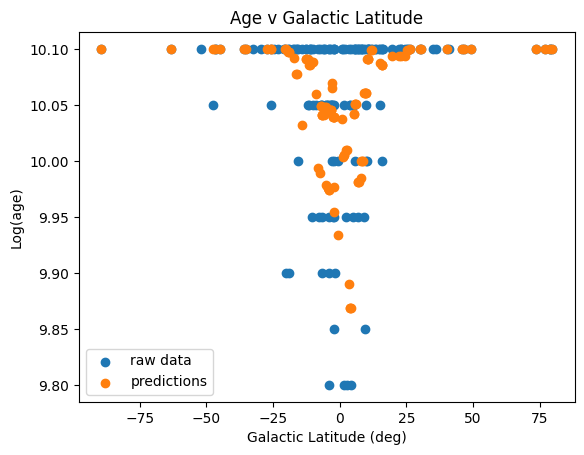

Average Training MSE: 0.001002568861364468
Average Validation MSE: 0.006801396034483176


In [1406]:
cluster_data_matrix_supreme = []
cluster_age_matrix_supreme = []
latNumbers = []
for i in range(sourceLength):
    if np.isnan(metallicity[i] or lii[i] or bii[i] or ra[i] or dec[i] or core_radius[i] or num_core_stars[i] or distance[i] or reddening[i] or log_age[i]) == False:
        if classification[i] == 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC':
            cluster_data_matrix_supreme.append([bii[i]])
            latNumbers.append(bii[i])
            cluster_age_matrix_supreme.append(log_age[i])

cluster_train, cluster_test, age_train, age_test = train_test_split(cluster_data_matrix_supreme, cluster_age_matrix_supreme, test_size=0.75)

# Create a decision tree regressor
model = RandomForestRegressor(max_depth=10, n_estimators=100)

# Train the model
model.fit(cluster_train, age_train)

# Make predictions on the test set
predictions = model.predict(cluster_test)

mse = mean_squared_error(age_test, predictions)
# print(age_test)
# print(predictions)
print(f'Mean Squared Error: {mse}')
plt.title('Age v Galactic Latitude')
plt.xlabel('Galactic Latitude (deg)')
plt.ylabel('Log(age)')
plt.scatter(latNumbers, cluster_age_matrix_supreme, label='raw data')
plt.scatter(cluster_test, predictions, label='predictions')
plt.legend()
plt.show()

# Number of folds for cross-validation
k_folds = 5
model = RandomForestRegressor(n_estimators=100)
kf = KFold(n_splits=k_folds, shuffle=True)

train_mse_list = []
val_mse_list = []

cluster_data_matrix_supreme = np.array(cluster_data_matrix_supreme)
cluster_age_matrix_supreme = np.array(cluster_age_matrix_supreme)
# Perform k-fold cross-validation
for train_index, test_index in kf.split(cluster_age_matrix_supreme):
    X_train, X_val = cluster_data_matrix_supreme[train_index], cluster_data_matrix_supreme[test_index]
    y_train, y_val = cluster_age_matrix_supreme[train_index], cluster_age_matrix_supreme[test_index]

    # Fit the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on the training set
    train_predictions = model.predict(X_train)

    # Make predictions on the validation set
    val_predictions = model.predict(X_val)

    # Calculate MSE for training and validation sets
    train_mse = mean_squared_error(y_train, train_predictions)
    val_mse = mean_squared_error(y_val, val_predictions)

    # Store MSE for each fold
    train_mse_list.append(train_mse)
    val_mse_list.append(val_mse)

# Calculate and print the average MSE across all folds
average_train_mse = np.mean(train_mse_list)
average_val_mse = np.mean(val_mse_list)

print(f'Average Training MSE: {average_train_mse}')
print(f'Average Validation MSE: {average_val_mse}')

Mean Squared Error: 0.007772442223473709


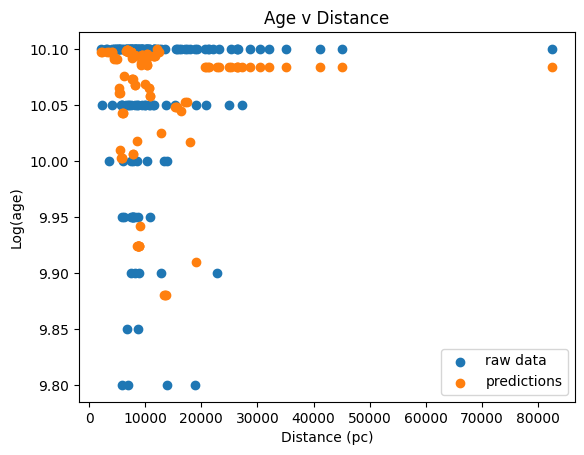

Average Training MSE: 0.0011715705085775414
Average Validation MSE: 0.009148309310345338


In [1407]:
cluster_data_matrix_supreme = []
cluster_age_matrix_supreme = []
distNumbers = []
for i in range(sourceLength):
    if np.isnan(metallicity[i] or lii[i] or bii[i] or ra[i] or dec[i] or core_radius[i] or num_core_stars[i] or distance[i] or reddening[i] or log_age[i]) == False:
        if classification[i] == 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC':
            cluster_data_matrix_supreme.append([distance[i]])
            distNumbers.append(distance[i])
            cluster_age_matrix_supreme.append(log_age[i])

cluster_train, cluster_test, age_train, age_test = train_test_split(cluster_data_matrix_supreme, cluster_age_matrix_supreme, test_size=0.75)

# Create a decision tree regressor
model = RandomForestRegressor(max_depth=10, n_estimators=100)

# Train the model
model.fit(cluster_train, age_train)

# Make predictions on the test set
predictions = model.predict(cluster_test)

mse = mean_squared_error(age_test, predictions)
# print(age_test)
# print(predictions)
print(f'Mean Squared Error: {mse}')
plt.title('Age v Distance')
plt.xlabel('Distance (pc)')
plt.ylabel('Log(age)')
plt.scatter(distNumbers, cluster_age_matrix_supreme, label='raw data')
plt.scatter(cluster_test, predictions, label='predictions')
plt.legend()
plt.show()

# Number of folds for cross-validation
k_folds = 5
model = RandomForestRegressor(n_estimators=100)
kf = KFold(n_splits=k_folds, shuffle=True)

train_mse_list = []
val_mse_list = []

cluster_data_matrix_supreme = np.array(cluster_data_matrix_supreme)
cluster_age_matrix_supreme = np.array(cluster_age_matrix_supreme)
# Perform k-fold cross-validation
for train_index, test_index in kf.split(cluster_age_matrix_supreme):
    X_train, X_val = cluster_data_matrix_supreme[train_index], cluster_data_matrix_supreme[test_index]
    y_train, y_val = cluster_age_matrix_supreme[train_index], cluster_age_matrix_supreme[test_index]

    # Fit the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on the training set
    train_predictions = model.predict(X_train)

    # Make predictions on the validation set
    val_predictions = model.predict(X_val)

    # Calculate MSE for training and validation sets
    train_mse = mean_squared_error(y_train, train_predictions)
    val_mse = mean_squared_error(y_val, val_predictions)

    # Store MSE for each fold
    train_mse_list.append(train_mse)
    val_mse_list.append(val_mse)

# Calculate and print the average MSE across all folds
average_train_mse = np.mean(train_mse_list)
average_val_mse = np.mean(val_mse_list)

print(f'Average Training MSE: {average_train_mse}')
print(f'Average Validation MSE: {average_val_mse}')

In [1408]:
## Now I want to test and see if we are over or under-fitting 

# Number of folds for cross-validation
k_folds = 5
model = RandomForestRegressor(n_estimators=100)
kf = KFold(n_splits=k_folds, shuffle=True)

train_mse_list = []
val_mse_list = []

cluster_data_matrix_supreme = []
cluster_age_matrix_supreme = []
metallicityNumbers = []
for i in range(sourceLength):
    if np.isnan(metallicity[i] or lii[i] or bii[i] or ra[i] or dec[i] or core_radius[i] or num_core_stars[i] or distance[i] or reddening[i] or log_age[i]) == False:
        if classification[i] == 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC':
            cluster_data_matrix_supreme.append([metallicity[i]])
            metallicityNumbers.append(metallicity[i])
            cluster_age_matrix_supreme.append(log_age[i])


cluster_data_matrix_supreme = np.array(cluster_data_matrix_supreme)
cluster_age_matrix_supreme = np.array(cluster_age_matrix_supreme)
# Perform k-fold cross-validation
for train_index, test_index in kf.split(cluster_age_matrix_supreme):
    X_train, X_val = cluster_data_matrix_supreme[train_index], cluster_data_matrix_supreme[test_index]
    y_train, y_val = cluster_age_matrix_supreme[train_index], cluster_age_matrix_supreme[test_index]

    # Fit the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on the training set
    train_predictions = model.predict(X_train)

    # Make predictions on the validation set
    val_predictions = model.predict(X_val)

    # Calculate MSE for training and validation sets
    train_mse = mean_squared_error(y_train, train_predictions)
    val_mse = mean_squared_error(y_val, val_predictions)

    # Store MSE for each fold
    train_mse_list.append(train_mse)
    val_mse_list.append(val_mse)

# Calculate and print the average MSE across all folds
average_train_mse = np.mean(train_mse_list)
average_val_mse = np.mean(val_mse_list)

print(f'Average Training MSE: {average_train_mse}')
print(f'Average Validation MSE: {average_val_mse}')

Average Training MSE: 0.0009116334184397473
Average Validation MSE: 0.0033366369611170094
